In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./L2T3_Dataset.csv")
df.head()

,Restaurant Name,Country Code,City,Address,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Name_Length,Address_Length
0,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),1,0,0,3,4.8,0,1,314,9542,9542
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),1,0,0,3,4.5,0,1,591,9542,9542
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),1,0,0,4,4.4,1,5,270,9542,9542
3,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),0,0,0,4,4.9,0,1,365,9542,9542
4,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),1,0,0,4,4.8,0,1,229,9542,9542


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9542 non-null   object 
 1   Country Code          9542 non-null   int64  
 2   City                  9542 non-null   object 
 3   Address               9542 non-null   object 
 4   Longitude             9542 non-null   float64
 5   Latitude              9542 non-null   float64
 6   Cuisines              9542 non-null   object 
 7   Average Cost for two  9542 non-null   int64  
 8   Currency              9542 non-null   object 
 9   Has Table booking     9542 non-null   int64  
 10  Has Online delivery   9542 non-null   int64  
 11  Is delivering now     9542 non-null   int64  
 12  Price range           9542 non-null   int64  
 13  Aggregate rating      9542 non-null   float64
 14  Rating color          9542 non-null   int64  
 15  Rating text          

In [24]:
columns_to_drop = ['Address_Length', 'Name_Length']
df = df.drop(columns=columns_to_drop)

<ipython-input-25-f3ca11e4b860>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=False)


<Axes: >

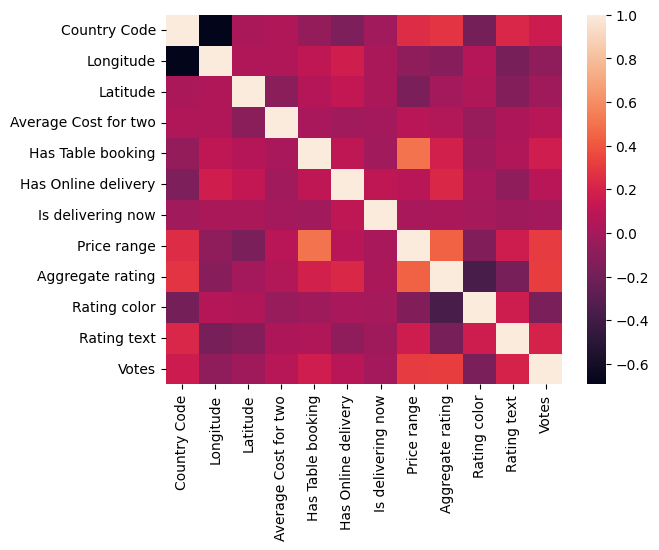

In [25]:
sns.heatmap(df.corr(), annot=False)

In [26]:
df.groupby('Cuisines')['Votes'].describe()

,count,mean,std,min,25%,50%,75%,max
Cuisines,,,,,,,,
Afghani,4.0,9.75,19.5,0.0,0.0,0.0,9.75,39.0
"Afghani, Mughlai, Chinese",1.0,2.00,NaN,2.0,2.0,2.0,2.00,2.0
"Afghani, North Indian",1.0,0.00,NaN,0.0,0.0,0.0,0.00,0.0
"Afghani, North Indian, Pakistani, Arabian",1.0,3.00,NaN,3.0,3.0,3.0,3.00,3.0
African,1.0,373.00,NaN,373.0,373.0,373.0,373.00,373.0
...,...,...,...,...,...,...,...,...
"Western, Asian, Cafe",1.0,259.00,NaN,259.0,259.0,259.0,259.00,259.0
"Western, Fusion, Fast Food",1.0,32.00,NaN,32.0,32.0,32.0,32.00,32.0
World Cuisine,1.0,95.00,NaN,95.0,95.0,95.0,95.00,95.0


In [27]:
cuisine_votes = df.groupby('Cuisines')['Votes'].sum().reset_index()
cuisine_votes = cuisine_votes.sort_values(by='Votes', ascending=False)
cuisine_votes.head()

,Cuisines,Votes
1514,"North Indian, Mughlai",53747
1306,North Indian,46241
1329,"North Indian, Chinese",42012
331,Cafe,30657
497,Chinese,21925


In [28]:
cuisine_ratings = df.groupby('Cuisines')['Rating text'].mean().reset_index()
cuisine_ratings = cuisine_ratings.sort_values(by='Rating text', ascending=False)

# Top 5 Cuisuine with highest average ratings
cuisine_ratings.head()

,Cuisines,Rating text
912,"Finger Food, North Indian, Continental, Italia...",5.0
778,"Desserts, Italian, Pizza",5.0
746,"Continental, North Indian, Thai, Chinese",5.0
747,"Continental, Seafood, Burger, South African, F...",5.0
749,"Continental, Seafood, Goan, Andhra, Kerala, Thai",5.0
